# Country Credit Rating Forecasting

## Introduction

This notebook contains the results of the data analysis performed on a set of countries credit ratings given by the IMF (International Monetary Fund) to a set of countries. The aim of the data analysis is to build a machine learning model from the rating data that can be used to predict the rating a country will receive.

The first section section of the notebook shows the exploratory data analysis (EDA) performed to explore and understand the data. It looks at each variable (factor) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows the development of a machine learning model. Many diffferent models are tested and the performance of all models are compared. Subsequently, a winner is selected and we do hyperparameter tunning.

In the model evaluation step we use different techniques such as a confusion matrix and scores as F1, Precision and Recall to understand different aspects of the performance of the model. We also perform feature selection to know what financial indicators are more relevant for the rating agencies.

## The Dataset

The IMF Dataset have 44 features (Macro-economic factors). 

**NGAP_NPGDP** : Output gap in percent of potential GDP

**LE** : Employment

**GGSB_NPGDP** : General government structural balance

**GGXWDN** : General government net debt

**GGXWDN_NGDP**	: General government net debt

**GGSB** : General government structural balance

**LUR** : Unemployment rate

**TMG_RPCH** :	Volume of Imports of goods

**NID_NGDP** :	Total investment

**TXG_RPCH** :	Volume of exports of goods

**TX_RPCH** :	Volume of exports of goods and services

**TM_RPCH** :	Volume of imports of goods and services

**NGSD_NGDP** :	Gross national savings

**GGXONLB** :	General government primary net lending/borrowing

**GGXONLB_NGDP** :	General government primary net lending/borrowing

**BCA** :	Current account balance

**BCA_NGDPD** :	Current account balance

**NGDPRPC** :	Gross domestic product per capita, constant prices

**GGR** :	General government revenue

**NGDP_R** :	Gross domestic product, constant prices

**PPPEX** :	Implied PPP conversion rate

**GGXCNL** :	General government net lending/borrowing

**NGDP_FY** :	Gross domestic product corresponding to fiscal year, current prices

**NGDP** :	Gross domestic product, current prices

**GGX** :	General government total expenditure

**GGXWDG** :	General government gross debt

**NGDPPC** :	Gross domestic product per capita, current prices

**PCPIPCH** :	Inflation, average consumer prices

**PCPIEPCH** :	Inflation, end of period consumer prices

**PCPIE** :	Inflation, end of period consumer prices

**PCPI** :	Inflation, average consumer prices

**GGXCNL_NGDP** :	General government net lending/borrowing

**NGDP_RPCH** :	Gross domestic product, constant prices

**GGX_NGDP** :	General government total expenditure

**NGDPD** :	Gross domestic product, current prices

**PPPGDP** :	Gross domestic product, current prices

**NGDP_D** :	Gross domestic product, deflator

**GGR_NGDP** :	General government revenue

**NGDPRPPPPC** :	Gross domestic product per capita, constant prices

**LP** :	Population

**NGDPDPC** :	Gross domestic product per capita, current prices

**PPPPC** :	Gross domestic product per capita, current prices

**PPPSH** :	Gross domestic product based on purchasing-power-parity (PPP) share of world total

**GGXWDG_NGDP** :	General government gross debt

### Libraries used : 

- Pandas 
- scikit-learn
- NumPy
- Seaborn
- Matplotlib
- Plotly

### Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
from numpy import sort
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import resample

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from random import sample
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

### Ignore Warnings

In [2]:
# import warnings filter
import warnings
# ignore all future warnings
warnings.filterwarnings("ignore")

## Uploading the two Datasets from the Excel Sheets 


In [3]:
indicators = pd.read_excel('Base FMI.xlsx')
rating = pd.read_excel('base ratings countries.xlsx')

In [4]:
indicators

Unnamed: 0      Country    NGDP_R  NGDP_RPCH       NGDP   NGDPD  PPPGDP  \
0           2015  Afghanistan  1197.012      0.988   1226.570  20.057  72.056   
1           2016  Afghanistan  1222.917      2.164   1222.917  18.020  70.098   
2           2017  Afghanistan  1255.288      2.647   1285.460  18.883  74.712   
3           2018  Afghanistan  1270.216      1.189   1327.690  18.401  77.418   
4           2019  Afghanistan  1319.902      3.912   1469.596  18.876  81.889   
...          ...          ...       ...        ...        ...     ...     ...   
1563        2018     Zimbabwe    20.098      4.732     36.945  36.945  35.791   
1564        2019     Zimbabwe    18.868     -6.122    212.173  26.032  34.202   
1565        2020     Zimbabwe    17.392     -7.825   1378.795  26.878  31.938   
1566        2021     Zimbabwe    18.863      8.462   3185.624  35.967  36.196   
1567        2022     Zimbabwe    19.435      3.029  12889.976  33.020  39.905   

         NGDP_D    NGDPRPC  NGDPRPPPPC  ...  GGXONLB  GGXONLB_NGDP  GGXWDN  \
0       102.469  42110.882    2506.346  ...  -16.270        -1.326     NaN   
1       100.000  41880.715    2492.647  ...    2.350         0.192     NaN   
2       102.404  42265.573    2515.553  ...   -7.767        -0.604     NaN   
3       104.525  40196.701    2392.418  ...   22.486         1.694     NaN   
4       111.341  40990.732    2439.677  ...  -14.971        -1.019     NaN   
...         ...        ...         ...  ...      ...           ...     ...   
1563    183.819   1372.679    2387.042  ...   -1.638        -4.433     NaN   
1564   1124.508   1265.849    2201.268  ...   -1.156        -0.545     NaN   
1565   7927.920   1144.994    1991.106  ...   12.203         0.885     NaN   
1566  16887.931   1217.593    2117.353  ...  -55.551        -1.744     NaN   
1567  66324.651   1228.736    2136.731  ... -254.291        -1.973     NaN   

      GGXWDN_NGDP     GGXWDG  GGXWDG_NGDP    NGDP_FY    BCA  BCA_NGDPD  Année  
0             NaN    112.281        9.154   1226.570  0.744      3.709   2015  
1             NaN    103.181        8.437   1222.917  1.627      9.029   2016  
2             NaN    102.807        7.998   1285.460  1.431      7.576   2017  
3             NaN     98.042        7.384   1327.690  2.237     12.158   2018  
4             NaN     90.092        6.130   1469.596  2.209     11.705   2019  
...           ...        ...          ...        ...    ...        ...    ...  
1563          NaN     18.842       51.001     36.945 -1.380     -3.734   2018  
1564          NaN    174.699       82.338    212.173  0.920      3.536   2019  
1565          NaN   1164.361       84.448   1378.795  0.678      2.524   2020  
1566          NaN   1905.213       59.807   3185.624  0.348      0.968   2021  
1567          NaN  11964.957       92.824  12889.976  0.267      0.808   2022  

[1568 rows x 47 columns]

In [5]:
rating

Country Rating 15 Rating 16 Rating 17 Rating 18 Rating 19  \
0           Afghanistan       NaN       NaN       NaN       NaN       NaN   
1               Albania       NaN         B         B         B         B   
2               Algeria       NaN       NaN       NaN       NaN       NaN   
3               Andorra       BBB       BBB       BBB       BBB       BBB   
4                Angola         B         B         B         B         B   
..                  ...       ...       ...       ...       ...       ...   
191             Vietnam       NaN        BB        BB        BB        BB   
192  West Bank and Gaza       NaN       NaN       NaN       NaN       NaN   
193               Yemen       NaN       NaN       NaN       NaN       NaN   
194              Zambia         B         B         B         B       CCC   
195            Zimbabwe       NaN       NaN       NaN        BB       NaN   

    Rating 20 Rating 21 Rating 22  
0         NaN       NaN       NaN  
1           B         B         B  
2         NaN       NaN       NaN  
3         BBB       BBB       BBB  
4         CCC         B         B  
..        ...       ...       ...  
191        BB        BB        BB  
192       NaN       NaN       NaN  
193       NaN       NaN       NaN  
194        RD        CC       NaN  
195         C         C       NaN  

[196 rows x 9 columns]

- The "indicators" Dataset contains the macro-economic factors for every country from 2015 to 2022.
- The "rating" Dataset contains the Credit Rating for every country from 2015 to 2022.
- We will proceed now to merge the two Datasets to get our final one.

In [6]:
indicators = indicators.rename(columns={'Unnamed: 0': 'Year'})
indicators = indicators.drop('Année', axis=1)

## Transforming the Rating DataFrame 

In [7]:
new_rating = pd.melt(rating, id_vars='Country')

new_rating 

Country   variable value
0            Afghanistan  Rating 15   NaN
1                Albania  Rating 15   NaN
2                Algeria  Rating 15   NaN
3                Andorra  Rating 15   BBB
4                 Angola  Rating 15     B
...                  ...        ...   ...
1563             Vietnam  Rating 22    BB
1564  West Bank and Gaza  Rating 22   NaN
1565               Yemen  Rating 22   NaN
1566              Zambia  Rating 22   NaN
1567            Zimbabwe  Rating 22   NaN

[1568 rows x 3 columns]

In [8]:
def determine_year(rating):
    if rating == "Rating 15":
        return 2015
    elif rating == "Rating 16":
        return 2016
    elif rating == "Rating 16":
        return 2016
    elif rating == "Rating 17":
        return 2017
    elif rating == "Rating 18":
        return 2018
    elif rating == "Rating 19":
        return 2019
    elif rating == "Rating 20":
        return 2020
    elif rating == "Rating 21":
        return 2021
    else:
        return 2022


In [9]:
new_rating['Year'] = new_rating['variable'].apply(determine_year)

new_rating = new_rating.drop('variable', axis=1)

new_rating = new_rating.rename(columns={'value': 'Rating'})

new_rating

Country Rating  Year
0            Afghanistan    NaN  2015
1                Albania    NaN  2015
2                Algeria    NaN  2015
3                Andorra    BBB  2015
4                 Angola      B  2015
...                  ...    ...   ...
1563             Vietnam     BB  2022
1564  West Bank and Gaza    NaN  2022
1565               Yemen    NaN  2022
1566              Zambia    NaN  2022
1567            Zimbabwe    NaN  2022

[1568 rows x 3 columns]

## Merging The Rating Table with the Indicators Table

- After transforming our Rating Dataset, we will merge the two datasets and drop the observations where the rating is NaN which is our target variable. Observations where the target variable is NaN (Not a number) are useless because isn't applicable.

In [10]:
rating_indicators = indicators.merge(new_rating,on=['Year','Country'],how='outer')


In [11]:
rating_indicators = rating_indicators.dropna(subset=['Rating'])
rating_indicators = rating_indicators.reset_index(drop=True)

In [12]:
rating_indicators

Year   Country   NGDP_R  NGDP_RPCH      NGDP   NGDPD  PPPGDP     NGDP_D  \
0     2016   Albania  760.044      3.315  1472.479  11.862  34.736    193.736   
1     2017   Albania  788.943      3.802  1550.645  13.053  37.609    196.547   
2     2018   Albania  820.653      4.019  1636.730  15.157  40.061    199.442   
3     2019   Albania  837.786      2.088  1691.903  15.399  41.631    201.949   
4     2020   Albania  808.617     -3.482  1644.077  15.161  40.706    203.320   
...    ...       ...      ...        ...       ...     ...     ...        ...   
1067  2020    Zambia  137.755     -2.785   332.223  18.111  63.635    241.170   
1068  2021    Zambia  144.090      4.599   443.362  22.148  69.551    307.698   
1069  2018  Zimbabwe   20.098      4.732    36.945  36.945  35.791    183.819   
1070  2020  Zimbabwe   17.392     -7.825  1378.795  26.878  31.938   7927.920   
1071  2021  Zimbabwe   18.863      8.462  3185.624  35.967  36.196  16887.931   

         NGDPRPC  NGDPRPPPPC  ...  GGXONLB  GGXONLB_NGDP    GGXWDN  \
0     264262.007   12597.301  ...   14.207         0.965  1028.471   
1     273542.434   13039.696  ...   10.109         0.652  1015.754   
2     284678.591   13570.554  ...    9.993         0.611  1006.271   
3     290805.660   13862.630  ...    3.564         0.211  1023.533   
4     280984.503   13394.458  ...  -75.980        -4.621  1149.157   
...          ...         ...  ...      ...           ...       ...   
1067    7277.953    3183.658  ...  -26.027        -7.834   458.771   
1068    7399.429    3236.796  ...   -9.074        -2.047   484.158   
1069    1372.679    2387.042  ...   -1.638        -4.433       NaN   
1070    1144.994    1991.106  ...   12.203         0.885       NaN   
1071    1217.593    2117.353  ...  -55.551        -1.744       NaN   

      GGXWDN_NGDP    GGXWDG  GGXWDG_NGDP   NGDP_FY    BCA  BCA_NGDPD  Rating  
0          69.846  1079.687       73.324  1472.479 -0.898     -7.572       B  
1          65.505  1114.833       71.895  1550.645 -0.978     -7.492       B  
2          61.481  1137.070       69.472  1636.730 -1.024     -6.754       B  
3          60.496  1139.796       67.368  1691.903 -1.166     -7.571       B  
4          69.897  1248.296       75.927  1644.077 -1.315     -8.677       B  
...           ...       ...          ...       ...    ...        ...     ...  
1067      138.091   465.812      140.211   332.223  1.922     10.613      RD  
1068      109.201   491.200      110.790   443.362  2.040      9.213      CC  
1069          NaN    18.842       51.001    36.945 -1.380     -3.734      BB  
1070          NaN  1164.361       84.448  1378.795  0.678      2.524       C  
1071          NaN  1905.213       59.807  3185.624  0.348      0.968       C  

[1072 rows x 47 columns]

- Now that we have our final Dataset let's take a look at the missing values (NaN) of the variables (factors). We will determine the percentage of missing values for each variable.

In [13]:
print((((rating_indicators.isna().sum().sort_values())/1072)*100).round(2).astype(str)+'%')

Year              0.0%
Rating            0.0%
Country           0.0%
GGXCNL_NGDP      0.19%
NGDP_RPCH        0.19%
GGX_NGDP         0.19%
NGDPD            0.19%
PPPGDP           0.19%
NGDP_D           0.19%
GGR_NGDP         0.19%
NGDPRPPPPC       0.19%
LP               0.19%
NGDPDPC          0.19%
PPPPC            0.19%
PPPSH            0.19%
GGXWDG_NGDP      0.19%
PCPIE            0.28%
PCPI             0.28%
PCPIPCH          0.37%
PCPIEPCH         0.37%
GGXCNL           0.47%
NGDP_FY          0.47%
NGDP             0.47%
GGX              0.47%
GGXWDG           0.47%
NGDPPC           0.47%
NGDPRPC          0.56%
GGR              0.56%
NGDP_R           0.56%
PPPEX            0.56%
BCA              1.12%
BCA_NGDPD        1.12%
GGXONLB_NGDP      2.8%
GGXONLB          3.08%
NGSD_NGDP        4.94%
TX_RPCH          5.04%
TM_RPCH          5.04%
TXG_RPCH          5.5%
TMG_RPCH          5.5%
NID_NGDP         7.28%
LUR             27.52%
GGSB            42.16%
GGXWDN          43.56%
GGXWDN_NGDP

- We can see that the factors : **LUR, GGSB , GGXWDN , GGXWDN_NGDP , GGSB_NPGDP , LE, NGAP_NPGDP** have significant number of missing values. Given the extent of missing values and the nature of the data, it appears that imputation may not be a suitable option in this case.

In [14]:
rating_indicators = rating_indicators.drop(['LUR','GGSB', 'GGXWDN', 'GGXWDN_NGDP', 'GGSB_NPGDP', 
                                            'LE', 'NGAP_NPGDP'], axis=1)

Before imputing the missing values, we need to identify the **IMF macroeconomic factors** that contain NaN values (missing values) for all years from 2015 to 2022.

Unfortunately, since these variables have missing data for the entire period, we will have no choice but to drop them from the dataset. However, this decision will not result in any loss of valuable information, given the correlation between these variables.

In [15]:
dict = {"Country":[],
        "index":[],
       "value":[]}
for country in rating_indicators['Country'].unique():
    for indx, values in rating_indicators[rating_indicators['Country'] == country].isna().sum().items():
        if values == 8 : 
            dict['Country'].append(country)
            dict['index'].append(indx)
            dict['value'].append(values)
            
df = pd.DataFrame(dict)

print(df['index'].unique())
print(len(df['Country'].unique()),"Countries that have missing macroeconomic factors values for all years from 2015 to 2022.")

['NID_NGDP' 'NGSD_NGDP' 'TM_RPCH' 'TMG_RPCH' 'TX_RPCH' 'TXG_RPCH'
 'GGXONLB' 'GGXONLB_NGDP']
11 Countries that have missing macroeconomic factors values for all years from 2015 to 2022.


### Distance Correlation

This metric can be applied to both linear and non-linear data.

Its advantages are that it does not assume the normality of the input vectors, and the presence of outliers has a reduced influence on it. The results range from 0 to 2, where 0 means perfect correlation and 2 means perfect negative correlation.

In [16]:
import scipy 

def calculate_dist_corr(v1: pd.Series, v2: pd.Series) -> float:
    dist_corr = scipy.spatial.distance.correlation(v1.dropna().head(990),v2.dropna().head(990))
    return dist_corr

In [17]:
for j in rating_indicators.drop(['Rating', 'Year', 'Country'], axis=1):
    
    for i in rating_indicators.drop(['Rating', 'Year', 'Country'], axis=1) : 
        
        if (i != j) and (calculate_dist_corr(rating_indicators[j], rating_indicators[i]) < 0.1):
            
            print(j,'and',i, 'are highly correlated with a value of :',calculate_dist_corr(rating_indicators[j],rating_indicators[i]),'\n')
            
        elif (i != j) and (calculate_dist_corr(rating_indicators[j], rating_indicators[i]) > 1.9):
            
            print(j,'and',i, 'are highly negatively correlated with a value of :',calculate_dist_corr(rating_indicators[j], 
                                             rating_indicators[i]),'\n')
            

NGDP_R and NGDP are highly correlated with a value of : 0.004644177150830542 

NGDP_R and GGR are highly correlated with a value of : 0.009161229599223053 

NGDP_R and GGX are highly correlated with a value of : 0.007680752207961605 

NGDP_R and GGXWDG are highly correlated with a value of : 0.044174014675519624 

NGDP_R and NGDP_FY are highly correlated with a value of : 0.004644175243424753 

NGDP and NGDP_R are highly correlated with a value of : 0.004644177150830542 

NGDP and GGR are highly correlated with a value of : 0.008611362636160913 

NGDP and GGX are highly correlated with a value of : 0.00509609017012691 

NGDP and GGXWDG are highly correlated with a value of : 0.03499323926048592 

NGDP and NGDP_FY are highly correlated with a value of : 1.0195255750744536e-10 

NGDPD and PPPGDP are highly correlated with a value of : 0.032107806300961106 

NGDPD and PPPSH are highly correlated with a value of : 0.038074759364434496 

PPPGDP and NGDPD are highly correlated with a value o

In [18]:
rating_indicators = rating_indicators.drop(['NID_NGDP', 'NGSD_NGDP', 'TM_RPCH', 'TMG_RPCH', 'TX_RPCH',
                                            'TXG_RPCH', 'GGXONLB', 'GGXONLB_NGDP'], axis=1)

In [19]:
# Identify the columns you want to move
columns_to_move = ['Country', 'Year', 'Rating']

# Create a list of column names in the desired order, excluding the columns to move
new_column_order = [col for col in rating_indicators.columns if col not in columns_to_move]

# Append the columns to move to the desired position in the list
new_column_order += columns_to_move

# Reorder the columns using reindex()
rating_indicators = rating_indicators.reindex(columns=new_column_order)

### Summary Statistics

In [20]:
def summary_statistics(df):
    summary_stats = df.describe().transpose()

    summary_stats.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Maximum'
        }, inplace=True)
    
    return(summary_stats)

In [21]:
sum_stat = summary_statistics(rating_indicators.drop(['Year'],axis=1))

sum_stat

Count          Mean  Standard Deviation     Minimum  \
NGDP_R       1066.0  1.498039e+05        9.912535e+05       0.258   
NGDP_RPCH    1070.0  2.409444e+00        5.491110e+00     -54.236   
NGDP         1067.0  2.092370e+05        1.455501e+06       0.006   
NGDPD        1070.0  5.715443e+02        2.061219e+03       0.869   
PPPGDP       1070.0  8.948958e+02        2.731578e+03       1.317   
NGDP_D       1070.0  1.872595e+06        6.121193e+07      75.402   
NGDPRPC      1066.0  1.988888e+06        6.892285e+06      28.899   
NGDPRPPPPC   1070.0  2.607998e+04        2.291714e+04    1083.521   
NGDPPC       1067.0  2.577530e+06        9.448970e+06       0.218   
NGDPDPC      1070.0  1.870120e+04        2.208558e+04     428.927   
PPPPC        1070.0  2.726977e+04        2.411186e+04     989.002   
PPPSH        1070.0  6.675290e-01        1.991418e+00       0.001   
PPPEX        1066.0  2.191245e+02        8.088422e+02       0.160   
PCPI         1069.0  2.568042e+11        2.979360e+12      53.367   
PCPIPCH      1068.0  6.713571e+01        2.000381e+03      -3.761   
PCPIE        1069.0  2.635762e+11        3.058283e+12      55.100   
PCPIEPCH     1068.0  1.284649e+02        3.979697e+03      -3.424   
LP           1070.0  5.025019e+01        1.726251e+02       0.033   
GGR          1066.0  3.708319e+04        2.240906e+05       0.292   
GGR_NGDP     1070.0  2.900487e+01        1.136502e+01       5.117   
GGX          1067.0  4.292673e+04        2.657391e+05       0.002   
GGX_NGDP     1070.0  3.245972e+01        1.096105e+01       9.761   
GGXCNL       1067.0 -5.878296e+03        4.788353e+04 -941421.627   
GGXCNL_NGDP  1070.0 -3.454857e+00        4.772119e+00     -37.592   
GGXWDG       1067.0  8.994882e+04        5.430584e+05       0.000   
GGXWDG_NGDP  1070.0  6.089397e+01        3.601888e+01       0.000   
NGDP_FY      1067.0  2.092368e+05        1.455501e+06       0.006   
BCA          1060.0  3.894305e+00        6.392707e+01    -925.562   
BCA_NGDPD    1060.0 -1.562215e+00        8.486425e+00     -48.404   

             25th Percentile      Median  75th Percentile       Maximum  
NGDP_R              70.37025    875.3425       7807.00775  1.171040e+07  
NGDP_RPCH            1.09350      2.9565          4.95200  4.174700e+01  
NGDP               105.43700   1328.9220      11251.21700  1.958845e+07  
NGDPD               19.59000     71.1435        362.74400  2.546447e+04  
PPPGDP              41.71750    163.9085        617.26850  3.021699e+04  
NGDP_D             102.63125    112.4505        148.03700  2.002296e+09  
NGDPRPC          18845.70675  58263.2575     404141.20675  5.575730e+07  
NGDPRPPPPC        8686.41850  17898.5215      39898.58350  1.252798e+05  
NGDPPC           26633.13650  78568.3590     595289.62550  9.564814e+07  
NGDPDPC           3622.85650   8535.4525      27570.08800  1.348023e+05  
PPPPC             9193.85250  18702.0400      41395.17675  1.381930e+05  
PPPSH                0.03100      0.1250          0.45175  1.853800e+01  
PPPEX                0.84250      4.5670         41.15950  7.541851e+03  
PCPI               101.65000    111.4470        155.22700  4.196422e+13  
PCPIPCH              1.13675      2.7575          5.44875  6.537408e+04  
PCPIE              102.43000    113.0240        160.58400  4.265928e+13  
PCPIEPCH             1.21450      2.9780          6.16775  1.300602e+05  
LP                   3.13450      9.8200         34.49975  1.423331e+03  
GGR                 33.68050    382.4860       2429.75350  2.977288e+06  
GGR_NGDP            20.18550     27.3900         36.80850  6.092000e+01  
GGX                 37.64250    413.1050       2910.93250  3.435855e+06  
GGX_NGDP            24.25475     31.7880         40.07275  6.992000e+01  
GGXCNL            -354.80300    -14.7880         -0.47100  4.865100e+04  
GGXCNL_NGDP         -5.68900     -3.0450         -0.85350  2.241300e+01  
GGXWDG              42.69550    728.7560       6234.15250  7.822402e+06  
GGXWDG_NGDP        

- Now that we handled the missing values of our datasets, we can start exploring our data through an EDA (Exploratory Data Analysis)

In [22]:
print((((rating_indicators.isna().sum().sort_values())/1072)*100).round(2).astype(str)+'%')

Rating          0.0%
Country         0.0%
Year            0.0%
NGDP_RPCH      0.19%
NGDPD          0.19%
PPPGDP         0.19%
NGDP_D         0.19%
GGXWDG_NGDP    0.19%
NGDPRPPPPC     0.19%
GGXCNL_NGDP    0.19%
NGDPDPC        0.19%
PPPPC          0.19%
PPPSH          0.19%
GGX_NGDP       0.19%
GGR_NGDP       0.19%
LP             0.19%
PCPIE          0.28%
PCPI           0.28%
PCPIPCH        0.37%
PCPIEPCH       0.37%
GGX            0.47%
GGXCNL         0.47%
NGDPPC         0.47%
GGXWDG         0.47%
NGDP_FY        0.47%
NGDP           0.47%
GGR            0.56%
PPPEX          0.56%
NGDPRPC        0.56%
NGDP_R         0.56%
BCA            1.12%
BCA_NGDPD      1.12%
dtype: object


- It is advisable to maintain the integrity of our dataset by refraining from imputing missing values, especially given that the proportion of missing values across variables is consistently below 5%. 


- This approach ensures that our data remains faithful to the actual observations and avoids introducing potential biases or inaccuracies through imputation techniques. By preserving the authenticity of the available data, we uphold the reliability and validity of our analytical outcomes.

In [23]:
final_rating = rating_indicators.dropna()

final_rating

NGDP_R  NGDP_RPCH      NGDP   NGDPD  PPPGDP     NGDP_D     NGDPRPC  \
0     760.044      3.315  1472.479  11.862  34.736    193.736  264262.007   
1     788.943      3.802  1550.645  13.053  37.609    196.547  273542.434   
2     820.653      4.019  1636.730  15.157  40.061    199.442  284678.591   
3     837.786      2.088  1691.903  15.399  41.631    201.949  290805.660   
4     808.617     -3.482  1644.077  15.161  40.706    203.320  280984.503   
...       ...        ...       ...     ...     ...        ...         ...   
1067  137.755     -2.785   332.223  18.111  63.635    241.170    7277.953   
1068  144.090      4.599   443.362  22.148  69.551    307.698    7399.429   
1069   20.098      4.732    36.945  36.945  35.791    183.819    1372.679   
1070   17.392     -7.825  1378.795  26.878  31.938   7927.920    1144.994   
1071   18.863      8.462  3185.624  35.967  36.196  16887.931    1217.593   

      NGDPRPPPPC      NGDPPC   NGDPDPC  ...   GGXCNL  GGXCNL_NGDP    GGXWDG  \
0      12597.301  511970.590  4124.405  ...  -22.052       -1.498  1079.687   
1      13039.696  537640.300  4525.887  ...  -21.795       -1.406  1114.833   
2      13570.554  567769.706  5257.714  ...  -26.521       -1.620  1137.070   
3      13862.630  587280.293  5345.058  ...  -31.579       -1.866  1139.796   
4      13394.458  571296.570  5268.239  ... -110.374       -6.713  1248.296   
...          ...         ...       ...  ...      ...          ...       ...   
1067    3183.658   17552.210   956.832  ...  -45.789      -13.783   465.812   
1068    3236.796   22767.914  1137.344  ...  -35.984       -8.116   491.200   
1069    2387.042    2523.249  2523.249  ...   -2.006       -5.428    18.842   
1070    1991.106   90774.209  1769.565  ...   10.354        0.751  1164.361   
1071    2117.353  205626.272  2321.629  ...  -68.752       -2.158  1905.213   

      GGXWDG_NGDP   NGDP_FY    BCA  BCA_NGDPD   Country  Year  Rating  
0          73.324  1472.479 -0.898     -7.572   Albania  2016       B  
1          71.895  1550.645 -0.978     -7.492   Albania  2017       B  
2          69.472  1636.730 -1.024     -6.754   Albania  2018       B  
3          67.368  1691.903 -1.166     -7.571   Albania  2019       B  
4          75.927  1644.077 -1.315     -8.677   Albania  2020       B  
...           ...       ...    ...        ...       ...   ...     ...  
1067      140.211   332.223  1.922     10.613    Zambia  2020      RD  
1068      110.790   443.362  2.040      9.213    Zambia  2021      CC  
1069       51.001    36.945 -1.380     -3.734  Zimbabwe  2018      BB  
1070       84.448  1378.795  0.678      2.524  Zimbabwe  2020       C  
1071       59.807  3185.624  0.348      0.968  Zimbabwe  2021       C  

[1054 rows x 32 columns]

# Exploratory Data Analysis (EDA)

In [24]:
final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1071
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NGDP_R       1054 non-null   float64
 1   NGDP_RPCH    1054 non-null   float64
 2   NGDP         1054 non-null   float64
 3   NGDPD        1054 non-null   float64
 4   PPPGDP       1054 non-null   float64
 5   NGDP_D       1054 non-null   float64
 6   NGDPRPC      1054 non-null   float64
 7   NGDPRPPPPC   1054 non-null   float64
 8   NGDPPC       1054 non-null   float64
 9   NGDPDPC      1054 non-null   float64
 10  PPPPC        1054 non-null   float64
 11  PPPSH        1054 non-null   float64
 12  PPPEX        1054 non-null   float64
 13  PCPI         1054 non-null   float64
 14  PCPIPCH      1054 non-null   float64
 15  PCPIE        1054 non-null   float64
 16  PCPIEPCH     1054 non-null   float64
 17  LP           1054 non-null   float64
 18  GGR          1054 non-null   float64
 19  GGR_NG

In [25]:
import plotly.express as px
cut_counts = final_rating['Rating'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values)

fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="Count"
)

fig.show()


In [26]:
final_rating['Rating'].value_counts(normalize=True)*100

B      31.499051
BBB    17.172676
BB     15.559772
A      11.100569
AA     10.436433
AAA     8.254269
CCC     4.079696
CC      0.853890
RD      0.759013
C       0.284630
Name: Rating, dtype: float64

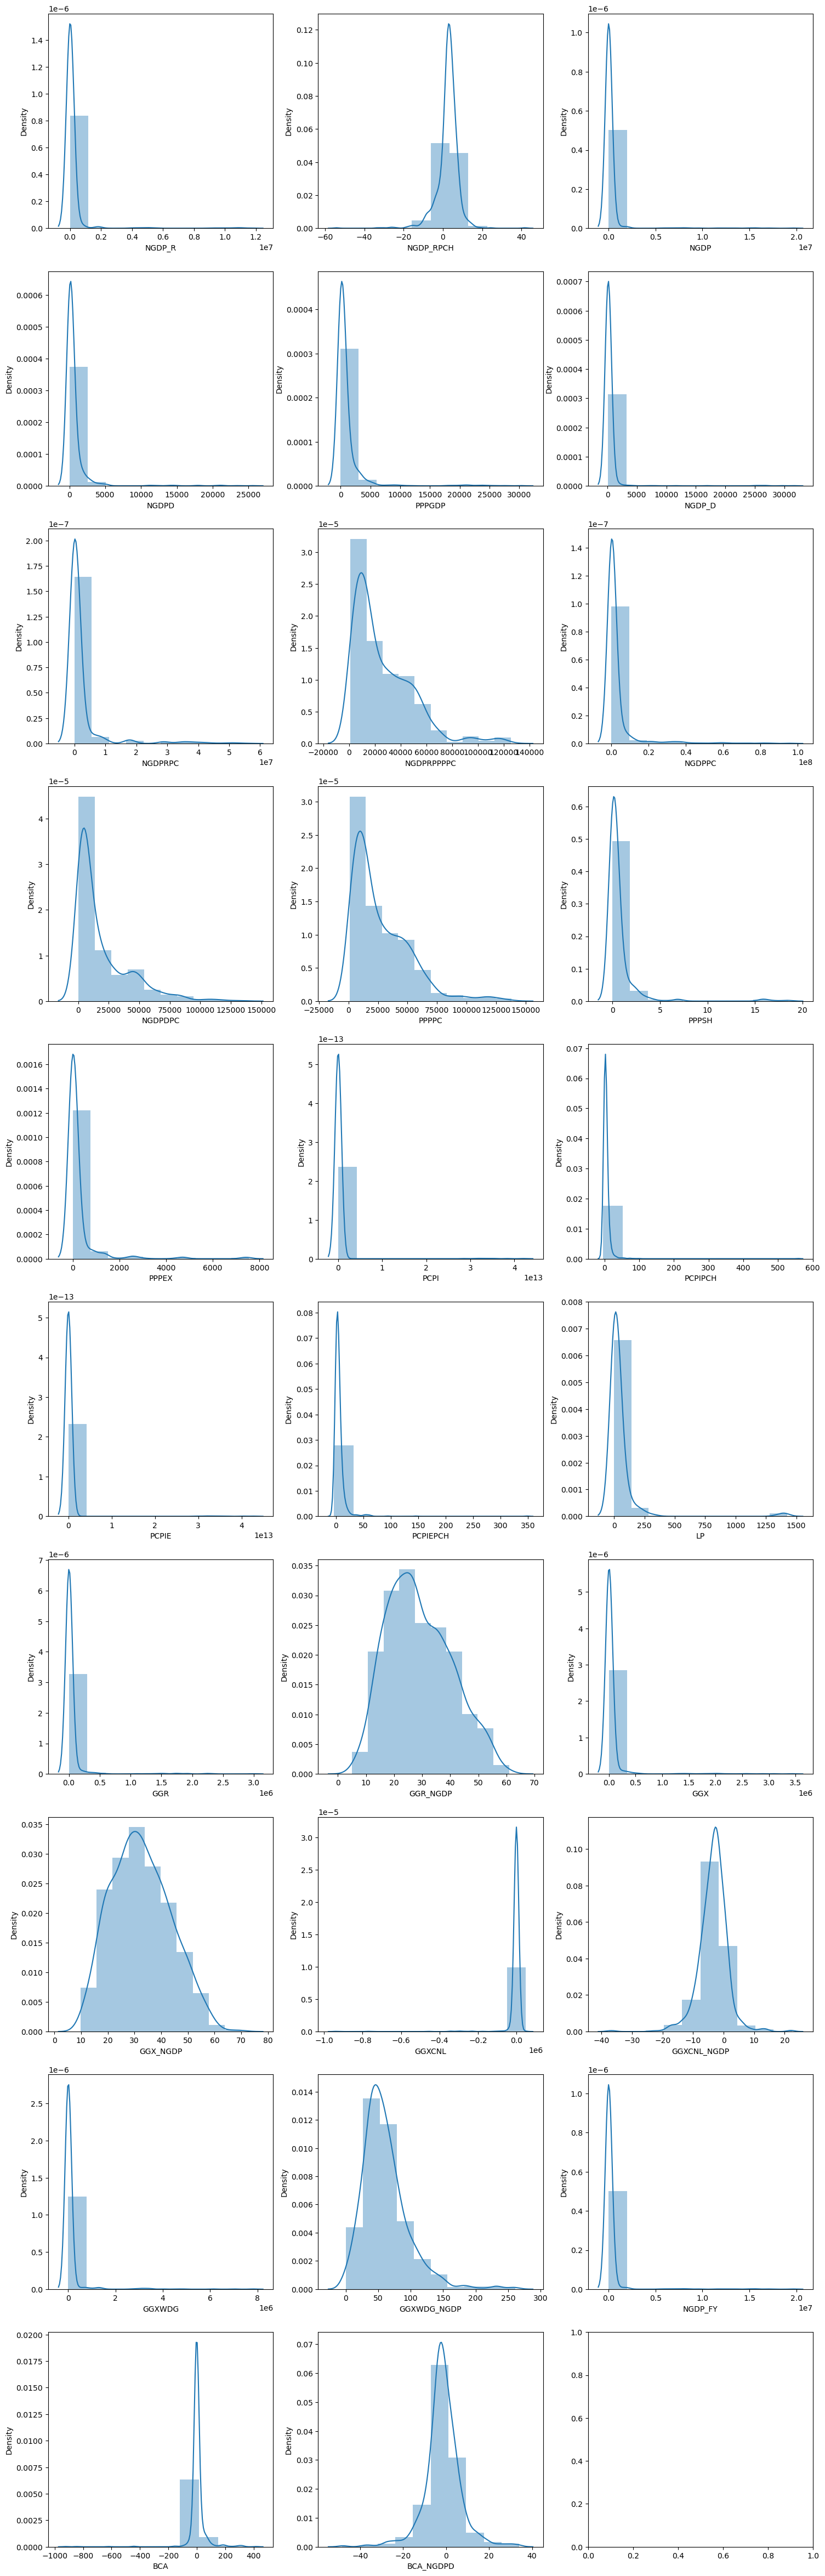

In [27]:
figure, axes = plt.subplots(nrows=10, ncols=3, figsize=(18,60))

i = 0 
j = 0

for c in final_rating.drop(['Country', 'Year', 'Rating'], axis=1).columns:
    
    sns.distplot(final_rating[c], bins=10, kde=True, ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1    

# Machine Learning

- Is it possible to predict what credit Rating a country will receive from a rating agency based on its macro-economic factors? If so, what are the most important predictors?

In the following steps we will perform the following:

1. Prepare the dataset
    - Transform/Encode the features kand labels
    - Apply SMOTE technique to solve the unbalanced classes problem
    - Split in train and test
2. Test a wide range of ML models (Tree-based, KNN and so on).
3. Compare the accuracy of all models.
4. Choose our winning model and tune hyperparameters to target a higher accuracy.
5. Make a more profound evaluation of the result with a confusion matrix and different measures.
6. identify the most important features to predict the rating.

### 1: Data Preparation : Encoding our categorical target variable (Rating)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Drop 'Year' and 'Country' columns
final_rating.drop(['Year', 'Country'], axis=1, inplace=True)

# Encode the target variable 'Rating'
label_encoder = LabelEncoder()
final_rating['Rating_encoded'] = label_encoder.fit_transform(final_rating['Rating'])

# Verify the encoding mapping
rating_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print('Encoding Mapping:', rating_mapping)

# Separate the features and target variable
X = final_rating.drop(['Rating', 'Rating_encoded'], axis=1)
y = final_rating['Rating_encoded'].astype('category')

Encoding Mapping: {0: 'A', 1: 'AA', 2: 'AAA', 3: 'B', 4: 'BB', 5: 'BBB', 6: 'C', 7: 'CC', 8: 'CCC', 9: 'RD'}


In [29]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 1054 entries, 0 to 1071
Series name: Rating_encoded
Non-Null Count  Dtype   
--------------  -----   
1054 non-null   category
dtypes: category(1)
memory usage: 9.6 KB


### SMOTE Technique to solve the unbalanced classes problem 

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=2)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)

Original dataset shape: (1054, 29) (1054,)
Resampled dataset shape: (3320, 29) (3320,)


In [31]:
y_resampled.value_counts()

0    332
1    332
2    332
3    332
4    332
5    332
6    332
7    332
8    332
9    332
Name: Rating_encoded, dtype: int64

### 1: Data Preparation : Train Test Split

In [32]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## K Nearest Neighbours

In [33]:
for i in range(3,7) :
    
    KNN_model = KNeighborsClassifier(n_neighbors = i)
    KNN_model.fit(X_train,y_train)
    y_pred_KNN = KNN_model.predict(X_test)
    Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
    print("k =",i,"KNN Accuracy Test Set:",Accuracy_KNN)

k = 3 KNN Accuracy Test Set: 0.8599397590361446
k = 4 KNN Accuracy Test Set: 0.838855421686747
k = 5 KNN Accuracy Test Set: 0.8298192771084337
k = 6 KNN Accuracy Test Set: 0.8162650602409639


In [34]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
print("KNN Accuracy Test Set:",Accuracy_KNN)

KNN Accuracy Test Set: 0.8599397590361446


## Logistic Regression

We will be normalizing the **X_train** and **X_test** for Logistic Regression

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [36]:
LR_model = LogisticRegression(random_state=42 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train_normalized, y_train)
y_pred_LR = LR_model.predict(X_test_normalized)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy Test Set:",Accuracy_LR)

LR Accuracy Test Set: 0.7063253012048193


## Random Forest

In [37]:
RF_model = RandomForestClassifier(random_state=34)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy Test Set:",Accuracy_RF)


RF Accuracy Test Set: 0.9563253012048193


## XGBoost

In [38]:
XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class =10)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy Test Set:",Accuracy_XGB)


XGB Accuracy Test Set: 0.9563253012048193


## Gradient Boosting Classifier

In [39]:
GBT_model = GradientBoostingClassifier()
GBT_model.fit(X_train, y_train)
y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(y_test, y_pred_GBT)
print("GBT Accuracy Test Set:",Accuracy_GBT)

GBT Accuracy Test Set: 0.9382530120481928


## Comparing Results

In [40]:
accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_KNN, Accuracy_LR]

model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest', 
              'KNN', 'Logistic Regression']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

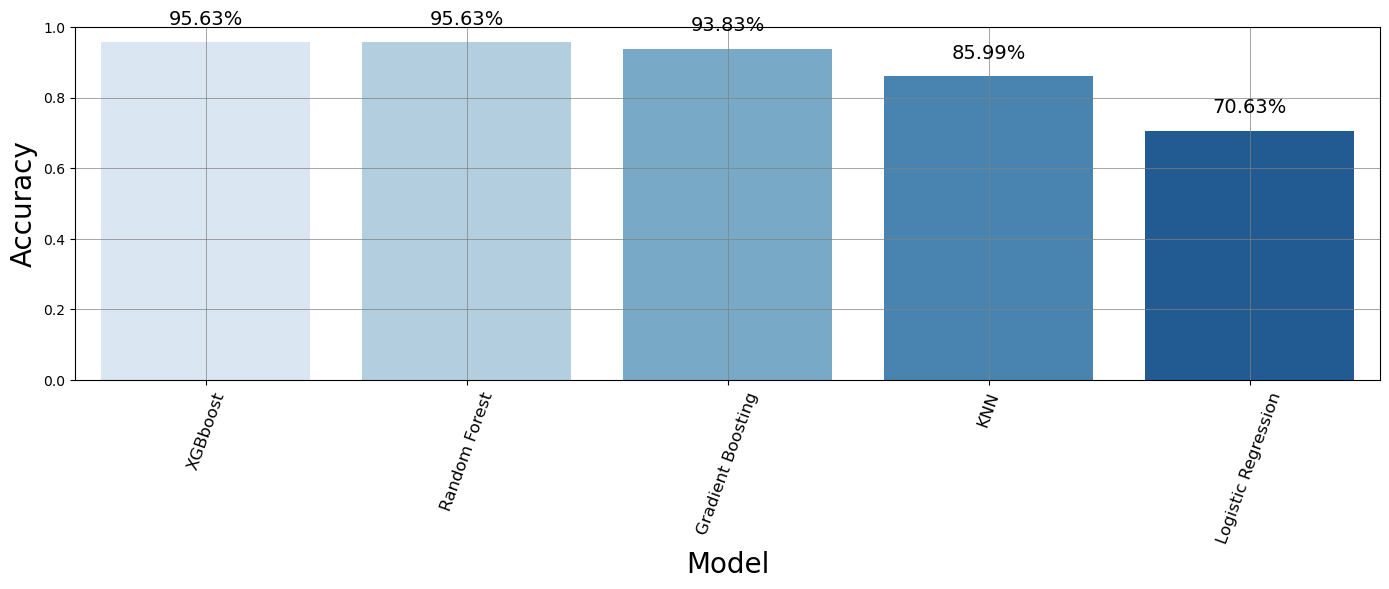

In [41]:
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(14,6))

# make barplot and sort bars

x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="Blues")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')




plt.tight_layout()

**XGboost** and **Random Forest** is the best performing models.

### XGBoost Hyperparameter Tunning

The XGboost model has achieved a very high accuracy given that we have 10 different classes. Now we will try to increase the performance even more. We will use a cross-validation approach. First we load the train and test data into DMatrices. **DMatrix** is a data structure used by XGBoost to optimize both memory efficiency and training speed.

In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

### Extracting the parameters dictionary

In [43]:
params = XGB_model.get_xgb_params()

params

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 10}

We will be using the **merror** error parameter. It represents the ratio of incorrect predictions to the total number of predictions in a multiclass classification problem.

The merror metric is calculated as follows:

merror = (incorrect_predictions) / (total_predictions)

In [44]:
params['eval_metric'] = "merror"

The **num_boost_round** which corresponds to the maximum number of boosting rounds that we allow.

In [45]:
num_boost_round = 1000

In [46]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=50,
    verbose_eval=30)

print("Best merror: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Test-merror:0.16717
[30]	Test-merror:0.04669
[60]	Test-merror:0.04669
[72]	Test-merror:0.04367
Best merror: 0.04 with 24 rounds


### Using XGBoost’s CV

In order to tune the other hyperparameters, we will use the cv function from XGBoost. It allows us to run cross-validation on our training dataset and returns a mean merror score. We will use a k = 5 for every parameter.

In [47]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'merror'},
    early_stopping_rounds=50,
    verbose_eval=30
)
cv_results.tail()

[0]	train-merror:0.09479+0.00899	test-merror:0.17508+0.01175
[30]	train-merror:0.00000+0.00000	test-merror:0.05761+0.01270
[60]	train-merror:0.00000+0.00000	test-merror:0.05572+0.01050
[90]	train-merror:0.00000+0.00000	test-merror:0.05572+0.00980
[91]	train-merror:0.00000+0.00000	test-merror:0.05572+0.01015


train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
38                0.0               0.0          0.056852         0.011068
39                0.0               0.0          0.055347         0.011463
40                0.0               0.0          0.055347         0.012471
41                0.0               0.0          0.054971         0.012518
42                0.0               0.0          0.054970         0.012171

In [48]:
cv_results['test-merror-mean'].min()

0.05497005224926723

### Parameters max_depth and min_child_weight.

In [49]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,12)
    for min_child_weight in range(5,8)
]

In [50]:
# Define initial best params and MAE
min_merror = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=50,
        verbose_eval=False

    )
    # Update best merror
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

CV with max_depth=5, min_child_weight=5
	MAE 0.055348116052843975 for 235 rounds
CV with max_depth=5, min_child_weight=6
	MAE 0.05497005224926723 for 212 rounds
CV with max_depth=5, min_child_weight=7
	MAE 0.05760800305849369 for 108 rounds
CV with max_depth=6, min_child_weight=5
	MAE 0.056478059555668834 for 138 rounds
CV with max_depth=6, min_child_weight=6
	MAE 0.05760517111989012 for 169 rounds
CV with max_depth=6, min_child_weight=7
	MAE 0.059490534245217566 for 75 rounds
CV with max_depth=7, min_child_weight=5
	MAE 0.05233493337864435 for 157 rounds
CV with max_depth=7, min_child_weight=6
	MAE 0.05722993925491696 for 142 rounds
CV with max_depth=7, min_child_weight=7
	MAE 0.055721931948515345 for 130 rounds
CV with max_depth=8, min_child_weight=5
	MAE 0.055724055902468025 for 214 rounds
CV with max_depth=8, min_child_weight=6
	MAE 0.054218172550019116 for 184 rounds
CV with max_depth=8, min_child_weight=7
	MAE 0.05873582260736587 for 156 rounds
CV with max_depth=9, min_child_weig

In [51]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

### Parameters subsample and colsample_bytree

In [52]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [53]:
# Define initial best params and MAE
min_merror = float("Inf")
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=10,
        verbose_eval=False
    )
    
    # Update best MAE
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (subsample,colsample)
print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

CV with subsample=1.0, colsample=1.0
	MAE 0.05986576611019073 for 31 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.05948770230661399 for 54 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.06024312192911657 for 47 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.0560985797827903 for 49 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.05798465089276864 for 51 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.06099358565906291 for 26 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.05798181895416508 for 46 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.05647735157101794 for 72 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.06212494513118956 for 52 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.05948911827591578 for 44 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.05610070373674299 for 62 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.05948982626056668 for 42 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.05684904351273664 for 64 rounds
CV with subsa

In [54]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

### Parameter ETA

In [55]:
%time
# This can take some time…
min_merror = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['merror'],
            early_stopping_rounds=10
)
    # Update best score
    mean_mae = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = eta
print("Best params: {}, merror: {}".format(best_params, min_merror))

Wall time: 0 ns
CV with eta=0.3
	MAE 0.0560985797827903 for 49 rounds

CV with eta=0.2
	MAE 0.06325205669541084 for 27 rounds

CV with eta=0.1
	MAE 0.06024241394446569 for 79 rounds

CV with eta=0.05
	MAE 0.061747589312263707 for 125 rounds

CV with eta=0.01
	MAE 0.0865964345892981 for 159 rounds

CV with eta=0.005
	MAE 0.11973224020503234 for 60 rounds

Best params: 0.3, merror: 0.060239582005862116


In [56]:
params['eta'] = 0.3

This are the final parameters of our tuned model.

In [57]:
params

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'eval_metric': 'merror',
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': 5,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 1.0,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 10,
 'eta': 0.3}

Let’s train a model with it and see how well it does on our test set!

In [58]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=1000,
    verbose_eval=100
)

[0]	Test-merror:0.21536
[100]	Test-merror:0.04819
[200]	Test-merror:0.04669
[300]	Test-merror:0.04669
[400]	Test-merror:0.04669
[500]	Test-merror:0.04669
[600]	Test-merror:0.04669
[700]	Test-merror:0.04669
[800]	Test-merror:0.04669
[900]	Test-merror:0.04669
[999]	Test-merror:0.04819


In [59]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    verbose_eval=100,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-merror:0.21536
[100]	Test-merror:0.04819
[151]	Test-merror:0.04518


In [60]:
metrics.accuracy_score(best_model.predict(dtest), y_test)

0.9548192771084337

### Confusion Matrix

In [61]:
cm = confusion_matrix(y_test, best_model.predict(dtest))

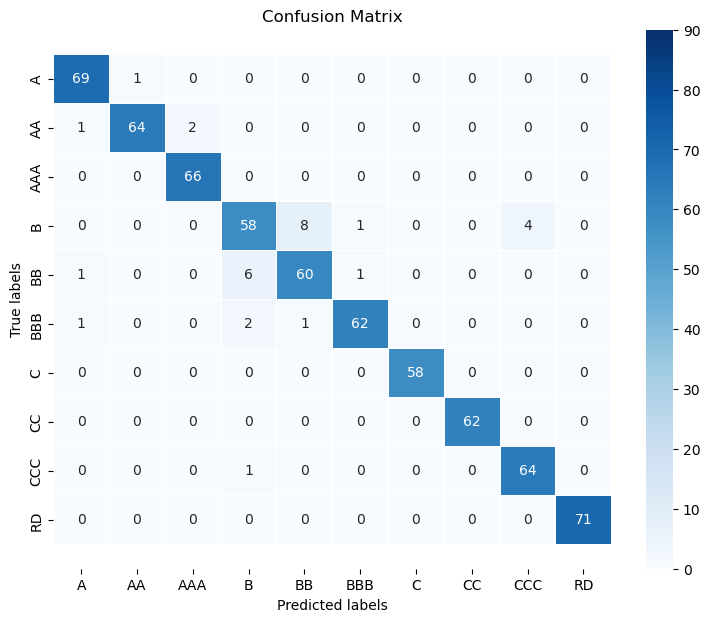

In [62]:
fig, ax = plt.subplots(figsize=(9,7))

sns.heatmap(cm, annot = True, ax = ax, vmin=0, vmax=90, fmt="d", linewidths=.5, linecolor = 'white', cmap="Blues")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(["A", "AA", "AAA", "B",'BB','BBB','C','CC','CCC','RD'])
ax.yaxis.set_ticklabels(["A", "AA", "AAA", "B",'BB','BBB','C','CC','CCC','RD']);

# This part is to correct a bug from the heatmap funciton from pyplot
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [63]:
print(classification_report(y_test, best_model.predict(dtest), target_names = ["A", "AA", "AAA", "B",'BB','BBB','C',
                                                                               'CC','CCC','RD']))

              precision    recall  f1-score   support

           A       0.96      0.99      0.97        70
          AA       0.98      0.96      0.97        67
         AAA       0.97      1.00      0.99        66
           B       0.87      0.82      0.84        71
          BB       0.87      0.88      0.88        68
         BBB       0.97      0.94      0.95        66
           C       1.00      1.00      1.00        58
          CC       1.00      1.00      1.00        62
         CCC       0.94      0.98      0.96        65
          RD       1.00      1.00      1.00        71

    accuracy                           0.95       664
   macro avg       0.96      0.96      0.96       664
weighted avg       0.95      0.95      0.95       664



### Feature Selection

In our tast task we will identify which features were the most valuable for our model. In our first step we will check if by any chance we can increase the accuracy of our model extracting a feature.

In [64]:
thresholds = sort(XGB_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGB_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.001, n=29, Accuracy: 95.63%
Thresh=0.005, n=28, Accuracy: 95.63%
Thresh=0.008, n=27, Accuracy: 96.08%
Thresh=0.009, n=26, Accuracy: 95.93%
Thresh=0.009, n=25, Accuracy: 95.93%
Thresh=0.014, n=24, Accuracy: 95.63%
Thresh=0.018, n=23, Accuracy: 96.23%
Thresh=0.018, n=22, Accuracy: 95.48%
Thresh=0.022, n=21, Accuracy: 95.63%
Thresh=0.025, n=20, Accuracy: 95.33%
Thresh=0.025, n=19, Accuracy: 95.18%
Thresh=0.025, n=18, Accuracy: 95.48%
Thresh=0.026, n=17, Accuracy: 95.33%
Thresh=0.026, n=16, Accuracy: 95.63%
Thresh=0.027, n=15, Accuracy: 95.78%
Thresh=0.027, n=14, Accuracy: 95.78%
Thresh=0.028, n=13, Accuracy: 95.18%
Thresh=0.031, n=12, Accuracy: 95.33%
Thresh=0.032, n=11, Accuracy: 94.58%
Thresh=0.041, n=10, Accuracy: 94.28%
Thresh=0.043, n=9, Accuracy: 94.43%
Thresh=0.045, n=8, Accuracy: 94.13%
Thresh=0.047, n=7, Accuracy: 93.98%
Thresh=0.047, n=6, Accuracy: 92.62%
Thresh=0.047, n=5, Accuracy: 90.66%
Thresh=0.057, n=4, Accuracy: 89.31%
Thresh=0.075, n=3, Accuracy: 78.31%
Thresh=0

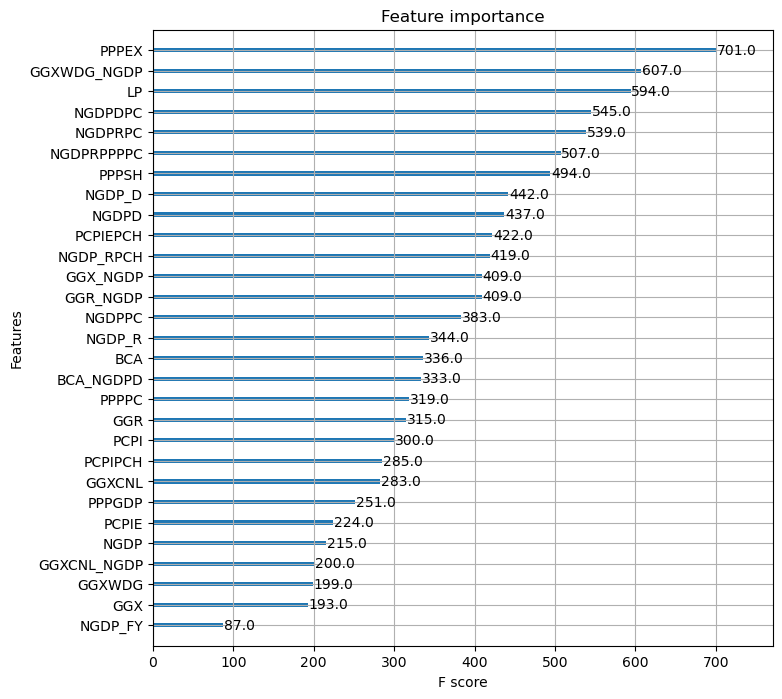

In [65]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))


plot_importance(model, ax=ax)
plt.show()

### Predicting Mauritania Rating 

In [66]:

X_Mauritania = indicators[(indicators['Country'] == 'Mauritania')][X.columns]
y_Mauritania = XGB_model.predict(X_Mauritania)

print(y_Mauritania)

new_rating[new_rating['Country'] == 'Mauritania']

[3. 3. 3. 3. 3. 3. 3. 3.]


Country Rating  Year
110   Mauritania    NaN  2015
306   Mauritania    NaN  2016
502   Mauritania    NaN  2017
698   Mauritania    NaN  2018
894   Mauritania    NaN  2019
1090  Mauritania    NaN  2020
1286  Mauritania    NaN  2021
1482  Mauritania    NaN  2022

Encoding Mapping: {0: 'A', 1: 'AA', 2: 'AAA', 3: 'B', 4: 'BB', 5: 'BBB', 6: 'C', 7: 'CC', 8: 'CCC', 9: 'RD'}

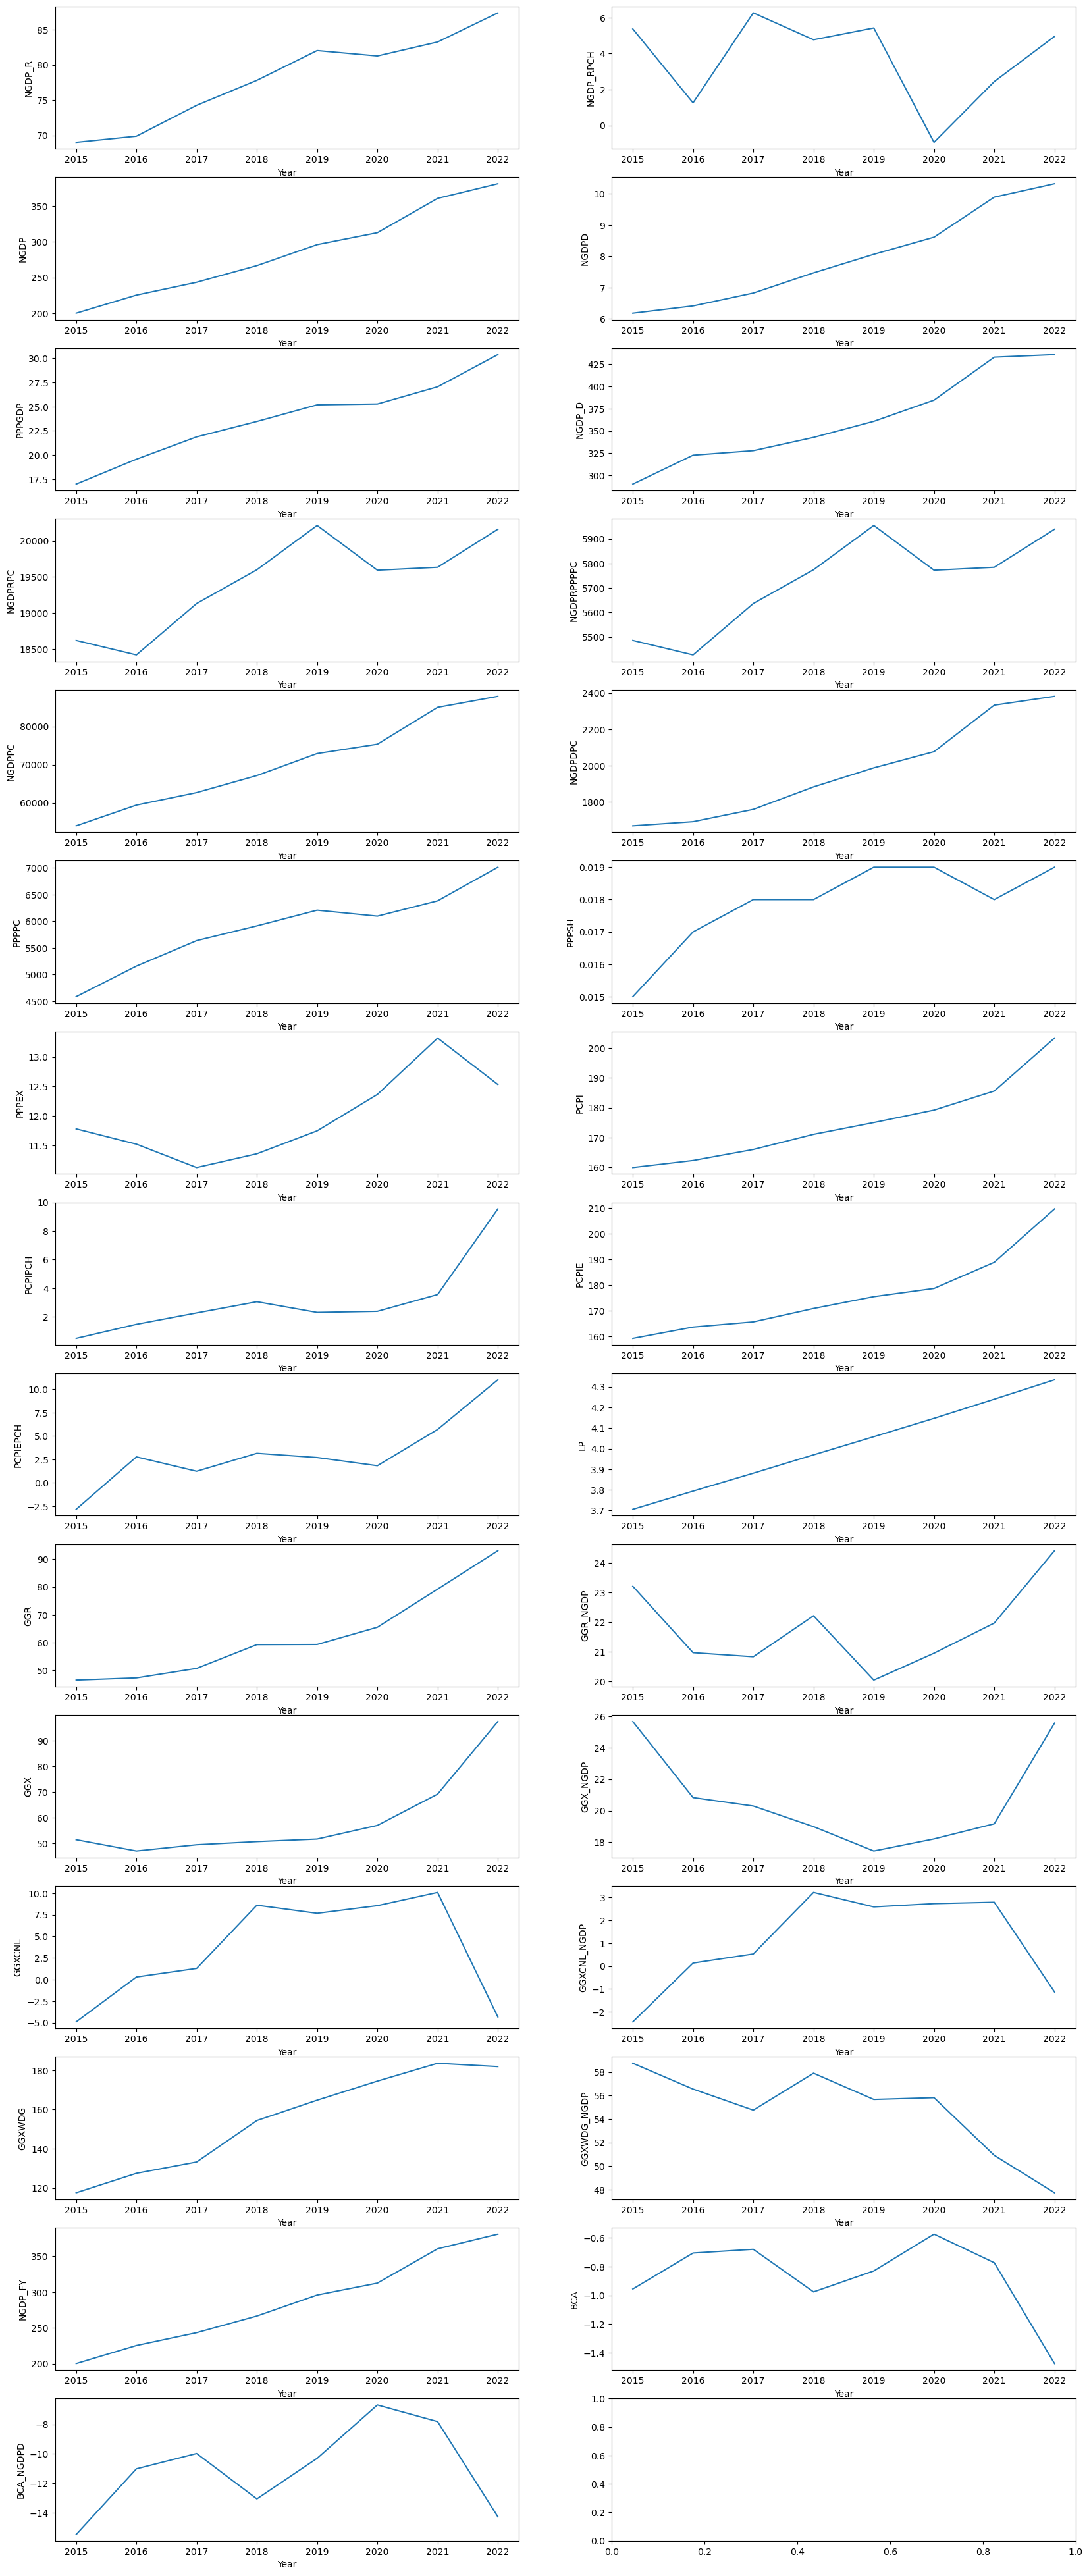

In [67]:
fig, ax = plt.subplots(nrows=15, ncols=2, figsize=(20,50))

i = 0
j = 0 
for c in X:
    sns.lineplot(data = indicators[indicators['Country'] == 'Mauritania'] , x='Year', y=c, ax=ax[i,j] )
    if j == 1:
        j=0
        i+=1
    else:
        j+=1    
    


In [68]:
# sns.pairplot(data=X_Mauritania, vars=['GGXWDG_NGDP','LP','NGDPDPC','NGDP_D','NID_NGDP'])
# plt.show()

In [69]:
# sns.heatmap(X_Mauritania[['GGXWDG_NGDP','LP','NGDPDPC','NGDPRPC','NGDP_D','NID_NGDP']].corr() ,annot=True, cmap="Blues")
# plt.show()

### Data Preparation : SMOTE Technique and Splitting data into training and test set

In [70]:
#from imblearn.over_sampling import SMOTE

# sm = SMOTE(k_neighbors=3)
# X_new_resampled, y_new_resampled = sm.fit_resample(X_new, y)

# print("Original dataset shape:", X_new.shape, y.shape)
# print("Resampled dataset shape:", X_new_resampled.shape, y_resampled.shape)

# Split the data into training and test sets
# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_resampled, y_new_resampled, test_size=0.2, 
#                                                                     random_state=42)

Train the model with the new number of features (6)

In [71]:
# XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class =10)
# XGB_model.fit(X_train_new, y_train_new)
# y_pred_XGB = XGB_model.predict(X_test_new)
# 
# Accuracy_XGB = metrics.accuracy_score(y_test_new, y_pred_XGB)
# print("XGB Accuracy Test Set:",Accuracy_XGB)
# 
# Accuracy_XGB_train = XGB_model.score(X_train_new, y_train_new)
# print("XGB Accuracy train Set:",Accuracy_XGB_train)

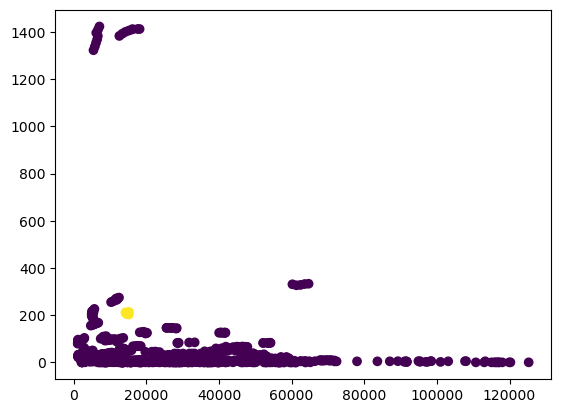